In [21]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.linalg import hilbert
from scipy.linalg import lu
from scipy import linalg as LA

### Teil A

In [22]:

#Spalten nach Aufgabenstellung

#1.Erste Spaltte: Zahl von 2 bis 13
erste=np.arange(2,14,1)

x=[]
zweite=[]
dritte=[]
vierte=[]
fuenfte=[]
sechste=[]

for i in erste:
    
    A=hilbert(i)
    m,n=A.shape
    x=np.zeros(m)
    x[0]=1
    x[n-1]=1
    b = A[:,0] + A[:,n-1]
    
    #2.Spalte: Inf-Norm
    konditionszahl=(LA.cond(A, np.inf))
    zweite.append(konditionszahl)
    
    
    #3. Spalte: Relative Fehler mit xbs=A\b
    xbs=np.asarray(LA.solve(A,b))
    dritte.append(LA.norm(x-xbs, np.inf)/LA.norm(x, np.inf))  
    
    #4. Spalte: Relative Fehler (xlr) mit [L,R,P]=lu(A) - LR-Zerlegung mit Permutationsmatrix
    P, L, U = lu(A) # u ist upper triangle, verwendung von scipy.linalg.lu
    y = LA.solve(P,b)
    z = LA.solve(L,y)
    xlr = LA.solve(U,z)
    vierte.append(LA.norm(x-xlr, np.inf)/LA.norm(x, np.inf))
    
    #5. Spalte: Relative Fehler (xchol) R=chol(A) mit Cholensky-Zerlegung
    L = LA.cholesky(A)
    y = LA.solve(L,b)
    xchol = LA.solve(L.T,y)
    fuenfte.append(LA.norm(x-xchol, np.inf)/LA.norm(x, np.inf))
    
    #6. Spalte: ||Axchol-b||_inf
    X = np.matmul(A,xchol)
    sechste.append(LA.norm(X-b, np.inf))
    
# #Ausgabe der Daten     
zweite=np.asarray(zweite, dtype=np.float64)
zweite=zweite*10e-16

# print(f'Zweite Spalte: {zweite} \n') #### mit 10e-16 multiplizieren???? #####
'''
Kommentar Jojo: In der Sprechstunde fragte tatsächlich jemand, dass die Werte wegen der Multiplikation (*10^-16) häufig "0" ergeben.
Tutor meinte, dass ist so gewollt
'''
xspalte=['Erste','Zweite','Dritte','Vierte','Fünfte','Sechste']
T1=pd.concat([pd.DataFrame(erste),pd.DataFrame(zweite),pd.DataFrame(dritte),pd.DataFrame(vierte),pd.DataFrame(fuenfte),pd.DataFrame(sechste)],axis=1)
print(T1.to_string(index=False,header=xspalte))

# Ab 14 sind Hilbert-Matrizen nicht mehr positiv definiert, 
# so dass die Cholesky-Zerlegung nicht mehr verwendet werden kann und die andere Lösungen nicht mehr stimmen.
# Der Cholensky Algorithmus schneidet am schlechtesten ab, weil er die schlechteste Konditionszahl hat. 

    

Erste Spalte: [ 2  3  4  5  6  7  8  9 10 11 12 13]

[[2.00000000e+00 2.70000000e-14 6.66133815e-16 6.66133815e-16
  7.77156117e-16 0.00000000e+00]
 [3.00000000e+00 7.48000000e-13 5.32907052e-15 5.32907052e-15
  5.19199925e-15 0.00000000e+00]
 [4.00000000e+00 2.83750000e-11 4.36525815e-13 4.36525815e-13
  4.07570045e-13 5.55111512e-17]
 [5.00000000e+00 9.43656000e-10 1.55431223e-12 1.55431223e-12
  1.36294155e-12 0.00000000e+00]
 [6.00000000e+00 2.90702790e-08 1.16743515e-10 1.16743515e-10
  1.00624717e-10 5.55111512e-17]
 [7.00000000e+00 9.85194890e-07 2.50351467e-09 2.50351467e-09
  2.80846598e-09 2.22044605e-16]
 [8.00000000e+00 3.38727908e-05 2.97225877e-08 2.97225877e-08
  2.64431214e-08 2.22044605e-16]
 [9.00000000e+00 1.09965099e-03 5.23114048e-08 5.23114048e-08
  6.73977524e-07 2.22044605e-16]
 [1.00000000e+01 3.53537246e-02 1.27014493e-06 1.27014493e-06
  4.82214971e-06 5.55111512e-17]
 [1.10000000e+01 1.23036994e+00 2.60830429e-04 2.60830429e-04
  1.20249694e-04 4.44089210e-1

In [23]:
spalte=['Erste','Zweite','Dritte','Vierte','Fünfte','Sechste']
T1=pd.concat([pd.DataFrame(erste),pd.DataFrame(zweite),pd.DataFrame(dritte),pd.DataFrame(vierte),pd.DataFrame(fuenfte),pd.DataFrame(sechste)], axis=1)
T1.columns = spalte
T1



,Erste,Zweite,Dritte,Vierte,Fünfte,Sechste
0,2,2.700000e-14,6.661338e-16,6.661338e-16,7.771561e-16,0.000000e+00
1,3,7.480000e-13,5.329071e-15,5.329071e-15,5.191999e-15,0.000000e+00
2,4,2.837500e-11,4.365258e-13,4.365258e-13,4.075700e-13,5.551115e-17
3,5,9.436560e-10,1.554312e-12,1.554312e-12,1.362942e-12,0.000000e+00
4,6,2.907028e-08,1.167435e-10,1.167435e-10,1.006247e-10,5.551115e-17
5,7,9.851949e-07,2.503515e-09,2.503515e-09,2.808466e-09,2.220446e-16
6,8,3.387279e-05,2.972259e-08,2.972259e-08,2.644312e-08,2.220446e-16
7,9,1.099651e-03,5.231140e-08,5.231140e-08,6.739775e-07,2.220446e-16
8,10,3.535372e-02,1.270145e-06,1.270145e-06,4.822150e-06,5.551115e-17
9,11,1.230370e+00,2.608304e-04,2.608304e-04,1.202497e-04,4.440892e-16


### Teil B

In [24]:
def tridiagloes(a,b,f):
    m = np.shape(f)
    m = int(m[0])
    
    y = np.zeros(m, dtype=float)
    x = np.zeros(m, dtype=float)
    c = np.zeros(m, dtype=float)
    d = np.zeros(m-1, dtype=float) 
    
    # Koeffizienten ausrechnen
    c[0] = math.sqrt(a[0])  
    for i in range(1,m):
        d[i-1] = (b[i-1])/(c[i-1])
        c[i] = np.sqrt(a[i]-((d[i-1])**2))
 
    # Vorwärt/ Rückwärts einsetzen
    y[0] = f[0]/c[0]
    for j in range(1,m):
        y[j] = (f[j]-d[j-1]*y[j-1])/(c[j])
    
    x[m-1] = y[m-1]/c[m-1]
    for k in reversed(range(m-1)):
        x[k] = (y[k]-d[k]*x[k+1])/(c[k])
    
    
    return(x)
    

In [25]:
# Aufgabe 4 anwenden:
n = 3
f = np.ones(n, dtype=float)
s = np.ones(n, dtype=float)

a = np.zeros(n, dtype=float)
b = np.zeros(n-1, dtype=float)

for l in range(n-1):
    a[l] = s[l] + s[l+1]
a[n-1] = s[n-1]
for m in range(n-1):
    b[m] = s[m]*-1
    
# Aufruf der Funktion:
u = tridiagloes(a,b,f)
print("Die Auslenkung der Ferderkette wird von folgendem Vektor beschrieben:",u)

Die Auslenkung der Ferderkette wird von folgendem Vektor beschrieben: [3. 5. 6.]


### Teil C

In [26]:
def cart2pol(A, t):
    
    #Karthesische Koordinaten 
    x = np.copy(A[0])
    y = np.copy(A[1])
    
    
    #Polar-Koordinaten
    phi = np.linspace(0, t, len(x))
    # rho = np.sqrt(x**2 + y**2)
    rho=7
    
    #Transformation
    for i in range(len(x)):
        # print(f'i: {i}, rho: {rho[i]}, phi:{phi[i]}')
        x[i] = rho*math.cos(phi[i])
        y[i] = rho*math.sin(phi[i])
    
    
    return np.column_stack((x,y))


In [29]:
ente=np.array([[0, 1, 1, 1.5 ,2.5 ,3, 3, 4, 2, 2, 1, -3.7, -5, -4, -3, 0],
              [1, 0, 3.5, 4, 4, 3.5, 3, 3, 2, -1, -2, -2, 1, 0, 1, 1]])

A=np.array([[0.87, -0.25],[0.7, 1.2]])

#Kreismatrix

ecken = 1000
radius = 6

winkel = np.linspace(0, 2*np.pi, ecken)
x = radius * np.cos(winkel) 
y = radius * np.sin(winkel) 

kreis = np.column_stack((x,y))

#Singulärwertzerlegung
U, S, V = LA.svd(A, full_matrices=True)
print(f'U: {U} \n')
print(f'S: {S} \n')
print(f'V: {V} \n')

S = np.diag(S)

print(f'S: {S} \n')

print(U@np.diag(S)@V)

U: [[-0.50085733  0.86552986]
 [ 0.86552986  0.50085733]] 

S: [1.41780935 0.85977709] 

V: [[ 0.86552986  0.50085733]
 [-0.50085733  0.86552986]] 

S_neu: [[1.25344407 0.        ]
 [0.         0.75344407]] 



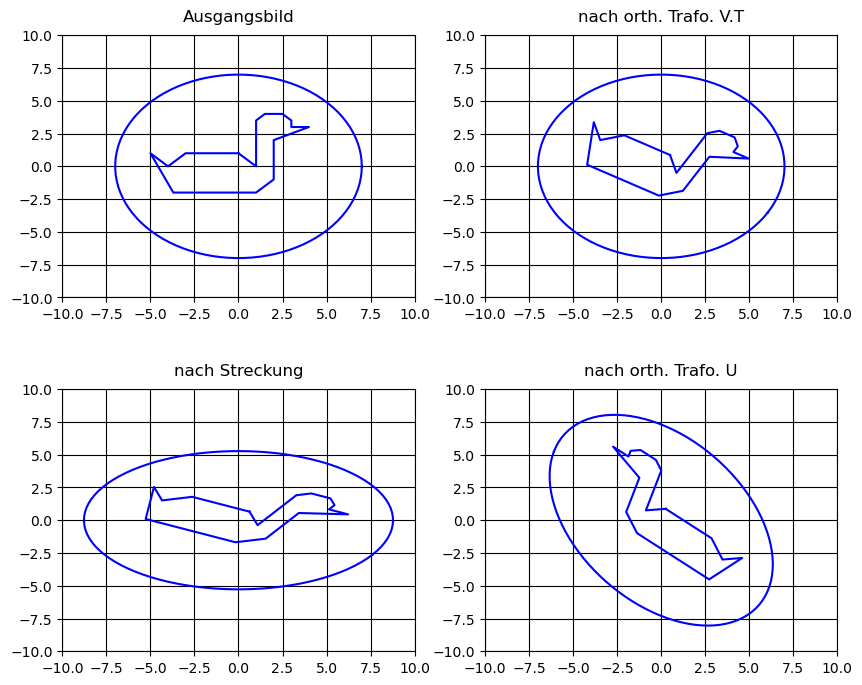

In [ ]:
ente=np.array([[0, 1, 1, 1.5 ,2.5 ,3, 3, 4, 2, 2, 1, -3.7, -5, -4, -3, 0],
              [1, 0, 3.5, 4, 4, 3.5, 3, 3, 2, -1, -2, -2, 1, 0, 1, 1]])

A=np.array([[-0.87, 0.25],[0.75, 0.87]])

kreis = cart2pol(np.zeros((2,100)), 2*math.pi)

U, S, V = LA.svd(A)

print(f'U: {U} \n')
print(f'S: {S} \n')
print(f'V: {V} \n')

d = S.shape[0]
S_neu = np.zeros((d, d))
S_neu = np.diag(S)

print(f'S_neu: {S_neu} \n')

f1= plt.figure(figsize=(10,8), dpi=100)


# 1.Subplot: Ausgangsbild
ax1 = plt.subplot(2,2,1)

plt.title("Ausgangsbild", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 

plt.plot(ente[0,:], ente[1,:], color='blue') 
plt.plot(kreis[:,0], kreis[:,1], color='blue') 

# 2.Subplot: nach orth. Trafo. V.T

ax2 = plt.subplot(2,2,2)

plt.title("nach orth. Trafo. V.T", pad ='10')

ente2= V.dot(ente)

kreis2 = V.dot(kreis.T).T
# kreis2 = np.matmul(V, kreis.T)

plt.xlim(-10, 10)
plt.ylim(-10, 10)

#transform the gitter to the new coordinate system 
ax2.grid(True,which='major',axis='both',color='k')


plt.plot(ente2[0,:], ente2[1,:], color='blue') 
plt.plot(kreis2[:,0], kreis2[:,1], color='blue') 



# 3.Subplot: nach Streckung

ax3 = plt.subplot(2,2,3)

ente3 = S_neu.dot(ente2)
kreis3 = S_neu.dot(kreis2.T).T
# kreis3 = np.matmul(S_neu, kreis2).T


plt.title("nach Streckung", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 


plt.plot(ente3[0,:], ente3[1,:], color='blue')
plt.plot(kreis3[:,0], kreis3[:,1], color='blue') 


# 4.Subplot: nach orth. Trafo. U

ax4 = plt.subplot(2,2,4)

ente4 = U.dot(ente3)
kreis4 = U.dot(kreis3.T).T
# kreis4 = np.matmul(U, kreis3.T)

plt.title("nach orth. Trafo. U", pad ='10')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid(color='k') 

plt.plot(ente4[0,:], ente4[1,:], color='blue')
plt.plot(kreis4[:,0], kreis4[:,1], color='blue') 

 
#Plots Einstellungen
plt.subplots_adjust(hspace=0.35)
plt.show() 

# Auswahl der Werte für die Matrix A
# Die Werte für die Etikette der Achsen anpassen 
# grid anpassen 